In [1]:
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from matplotlib import pyplot as plt
import numpy as np

In [16]:
df = pd.read_table('Fecal_D7_MAGs_AAI_matrix.txt', header=0, index_col=0, sep='\t')
df

,C7_D7_10,C7_D7_9,C8_D7_003,C8_D7_007,C8_D7_3,C8_D7_6,C9_D7_007,cow4_001,cow4_008,cow4_10,...,pig9_007,pig9_12,pig9_13,pig9_16,pig9_17,pig9_22,pig9_24,pig9_30,pig9_3,pig9_6
C7_D7_10,100.00,37.58,51.76,37.79,38.18,45.78,37.61,36.63,42.71,43.34,...,38.29,43.57,38.15,37.46,39.84,38.86,37.93,42.79,36.46,37.60
C7_D7_9,37.58,100.00,37.73,86.14,39.69,36.63,81.38,35.72,36.49,36.56,...,37.60,36.66,37.66,36.30,37.72,38.17,37.31,35.97,35.51,36.19
C8_D7_003,51.76,37.73,100.00,37.66,37.62,46.09,37.26,36.53,43.36,44.28,...,38.29,44.46,38.17,37.75,40.21,38.96,38.41,43.22,37.08,37.50
C8_D7_007,37.79,86.14,37.66,100.00,39.99,36.92,81.56,36.27,37.67,37.25,...,38.49,37.23,38.10,37.15,40.10,39.49,38.30,36.57,36.33,37.34
C8_D7_3,38.19,39.69,37.62,39.99,100.00,37.74,39.81,35.95,36.73,36.37,...,38.19,36.35,37.63,37.27,38.62,38.55,37.97,36.81,36.81,37.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pig9_22,38.86,38.17,38.96,39.49,38.57,37.81,39.05,39.63,40.21,39.38,...,52.05,38.98,43.57,42.12,45.46,100.00,42.50,39.71,40.73,42.96
pig9_24,37.93,37.29,38.41,38.28,37.98,37.84,38.30,39.36,41.17,39.02,...,42.86,38.85,43.25,44.20,47.53,42.50,100.00,38.87,40.37,40.20
pig9_30,42.79,35.94,43.21,36.57,36.81,41.59,36.18,37.00,44.96,45.95,...,38.53,46.87,38.69,38.52,40.42,39.65,38.85,100.00,37.68,38.01
pig9_3,36.38,35.51,37.08,36.32,36.81,36.48,35.96,37.63,38.94,37.51,...,39.90,37.41,40.19,41.33,44.12,40.72,40.37,37.68,100.00,40.33


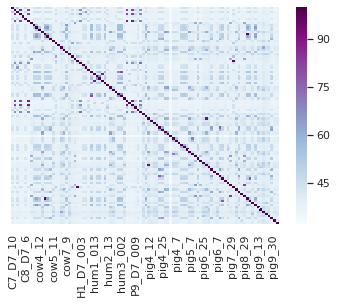

In [57]:
m = sns.heatmap(df, cmap="BuPu", yticklabels=False)

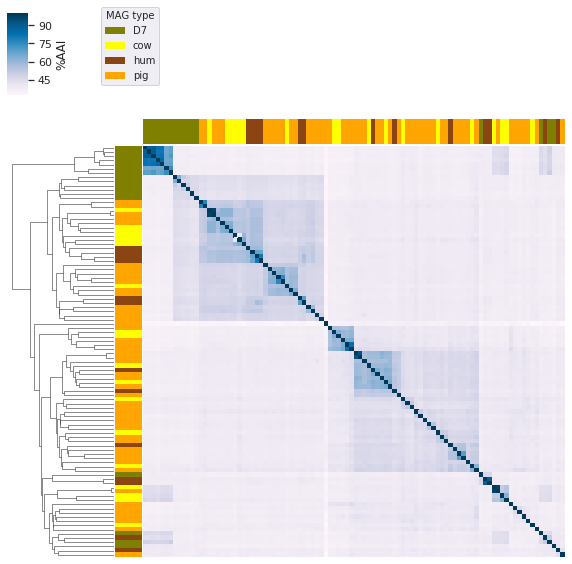

In [94]:
#Create New DF called row_names with MAG name and host_type
row_names = pd.DataFrame(columns = ["MAG"])
row_names["MAG"] = df.index
row_names["host_type"] = row_names["MAG"].str.extract("(pig|cow|hum|D7)")[0]
#print(row_names.head())

#Add column to table with color
my_palette = dict(zip(row_names["host_type"].unique(), ["olive","yellow","saddlebrown","orange"]))
row_names["colors"] = row_names["host_type"].map(my_palette)
#print(row_names.head())

hm_pallate = dict(zip(list(row_names.MAG), list(row_names.colors)))
row_colors = df.index.map(hm_pallate)

#colbar_kws = {'drawedges':True ,'label':'%AAI'}
m = sns.clustermap(df, cmap="PuBu",yticklabels=False, xticklabels=False, 
                   row_colors=row_colors, col_colors=row_colors, cbar_kws={'label':'%AAI'})

#Still cluster the columns but remove the dendrogram
m.ax_col_dendrogram.set_visible(False)


for label in row_names["host_type"].unique():
    m.ax_row_dendrogram.bar(0, 0, color=my_palette[label],
                            label=label, linewidth=0)

m.ax_row_dendrogram.legend(loc="upper right", bbox_to_anchor=(1.47, 1.35), fontsize="medium", title="MAG type")


plt.savefig("Fecal__D7_MAGs_AAI_heatmap.pdf")

In [114]:
df2 = pd.read_table('Fecal_D7_MAGs_AAI_table.txt', header=0, sep='\t')

df2_rm100=df2.loc[df2['ANI'] != 100]
df2_rm100['ANI'].mean()

41.02241952451076

(array([  2.,   2.,   8.,  16.,  40.,  14.,  30.,   8.,  26.,  63., 145.,
        259., 410., 624., 757., 799., 843., 835., 759., 507., 322., 236.,
        174., 131., 123.,  93.,  94., 117., 103., 136., 105., 109.,  99.,
        130., 116., 121., 118., 125., 109.,  95.,  51.,  38.,  24.,  16.,
         24.,  22.,  28.,  14.,  28.,  24.,  21.,  21.,  16.,  16.,  12.,
         14.,  20.,  12.,  15.,  13.,  20.,  22.,  14.,   8.,   8.,   6.,
         24.,  14.,   4.,   8.,   8.,   4.,   5.,  13.,  10.,   6.,   4.,
          2.,   4.,   8.,   2.,  10.,   0.,   0.,   4.,   2.,   4.,   4.,
          4.,   0.,   0.,   4.,   4.,   2.,   0.,   2.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
          0.,   2.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,   0.,   4.,   2.,   4.,   2.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
          0.,   4.,   0.,   2.,   0., 

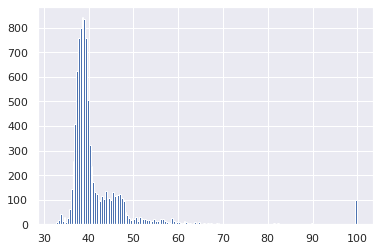

In [127]:
plt.hist(df2['ANI'], bins='auto')

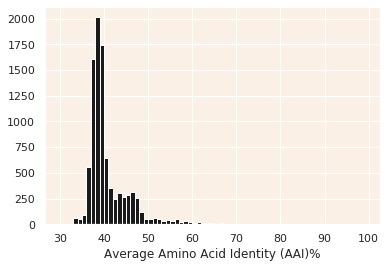

In [159]:
plt.rcParams['axes.facecolor'] = 'linen'
num_bins = list(range(30,100,1))

plt.hist(df2_rm100['ANI'], bins=num_bins, color='k')
plt.xlabel('Average Amino Acid Identity (AAI)%')
plt.savefig("Fecal_D7_MAGs_AAI_histogram.pdf")

Text(0.5, 0, 'Average Amino Acid Identity (AAI)%')

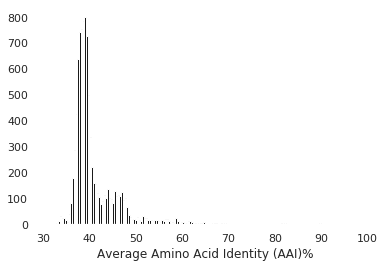

In [146]:
plt.hist(df2_rm100['ANI'], bins='auto', color='k', rwidth=0.85)
plt.xlabel('Average Amino Acid Identity (AAI)%')